# 👁️ Lo and behold!

In [ ]:
#| default_exp lo

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export
from typing import Union

import numpy as np
from fastcore.all import store_attr

from lovely_numpy.utils import history_warning
from lovely_numpy.repr_str import lovely
from lovely_numpy.repr_rgb import rgb
from lovely_numpy.repr_chans import chans


In [ ]:
#| exporti

class RGBProxy():
    """Flexible `PIL.Image.Image` wrapper"""
    
    def __init__(self, x:np.ndarray):
        # super().__init__()
        assert x.ndim >= 3, f"Expecting at least 3 dimensions, got shape{t.shape}={t.dim()}"
        self.x = x

    def __call__(   self,
                    denorm=None,
                    cl=True,
                    gutter_px=3, frame_px=1,
                    scale=1,
                    view_width=966):

        return rgb(self.x, denorm=denorm, cl=cl, gutter_px=gutter_px,
                frame_px=frame_px, view_width=view_width, scale=scale)
    
    def _repr_png_(self):
        return self.__call__()._repr_png_()

In [ ]:
# |exporti

class ChanProxy():
    def __init__(self, x: np.ndarray):
        self.t = x
    
    def __call__(self,
                 cmap = "coolwarm", 
                 cm_below="blue",
                 cm_above="red",
                 cm_ninf="cyan",
                 cm_pinf="fuchsia",
                 cm_nan="yellow",
                 view_width=966,
                 gutter_px=3,
                 frame_px=1,
                 scale=1):
        
        return chans(self.t,
                     cmap=cmap,
                     cm_below=cm_below,
                     cm_above=cm_above,
                     cm_ninf=cm_ninf,
                     cm_pinf=cm_pinf,
                     cm_nan=cm_nan,
                     view_width=view_width,
                     gutter_px=gutter_px,
                     frame_px=frame_px,
                     scale=scale)
    
    def _repr_png_(self):
        return self.__call__()._repr_png_()

In [ ]:
#| export

class Lo():
    """Lo and behold! What a lovely `numpy.ndarray`!"""
    def __init__(self, x: Union[np.ndarray, np.generic],    # Your data
                    plain       =False, # Show as plain text - values only
                    verbose     =False, # Verbose - show values too
                    depth       =0,     # Expand up to `depth`
                    color :bool =None): # Use ANSI colors
        store_attr()
        history_warning()

    def __repr__(self):
        return lovely(self.x, plain=self.plain, verbose=self.verbose,
                      depth=self.depth, color=self.color)

    @property
    def v(self):
        "Verbose"
        return Lo(self.x, verbose=True, color=self.color)

    @property
    def p(self):
        "Good old plain representation"
        return Lo(self.x, plain=True, color=self.color)

    @property
    def deeper(self):
        "Going deeper"
        return Lo(self.x, verbose=False, plain=False, depth=1, color=self.color)

    @property
    def rgb(self):
        "Show an image"
        return RGBProxy(self.x)

    @property
    def chans(self):
        "Show color channels"
        return ChanProxy(self.x)

    # This is used for .deeper attribute and .deeper(depth=...).
    # The second one results in a __call__.
    def __call__(self, depth=1):
        return Lo(self.x, depth=depth, color=self.color)

### Examples

In [ ]:
t = np.array([[1,2,3], [4,5,6]])
t

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
Lo(t).v # Verbose

array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
Lo(t).p # Plain

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
Lo(t).deeper

array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
  array[3] i64 x∈[1, 3] μ=2.000 σ=0.816 [1, 2, 3]
  array[3] i64 x∈[4, 6] μ=5.000 σ=0.816 [4, 5, 6]

In [ ]:
Lo(t[None]).deeper(2) # We need to go deeper

array[1, 2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[[1, 2, 3], [4, 5, 6]]]
  array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
    array[3] i64 x∈[1, 3] μ=2.000 σ=0.816 [1, 2, 3]
    array[3] i64 x∈[4, 6] μ=5.000 σ=0.816 [4, 5, 6]

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
image = np.load("mysteryman.npy").transpose(1,2,0)

In [ ]:
spicy = image.flatten()[:12].copy()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
Lo(spicy)

array[2, 6] f32 n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN!

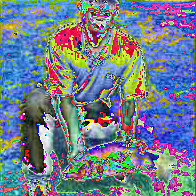

In [ ]:
Lo(image).rgb

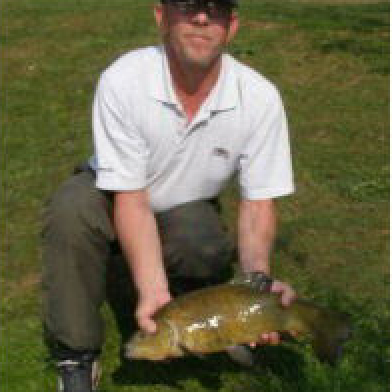

In [ ]:
Lo(image).rgb(scale=2, denorm=in_stats)

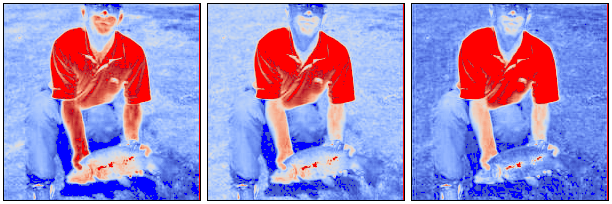

In [ ]:
Lo(image*0.3+0.5).chans

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()